<a href="https://colab.research.google.com/github/AyushGupta-04/Customer-Churn-Prediction-using-ANN/blob/main/churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Customer Churn Prediction Using Artificial Neural Networks(ANN):***

## **Project Overview**
*This project predicts whether a customer is likely to leave (churn) using Artificial Neural Networks (ANN).
The dataset contains customer details such as demographics, account information, and service usage patterns.*

 **Import  Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


**Load Dataset**

In [ ]:
churn = pd.read_csv('Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Exploratory Data Analysis**

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.shape

(10000, 14)

In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
churn.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


## **Drop UnNecessary Columns**

In [ ]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# **Data Preprocessing**

**Encode Categorical Value**

In [ ]:
churn['Gender'] = churn['Gender'].map({'Male':1 ,'Female':0})


In [ ]:
churn['Gender']

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


**One Hot Coding**

In [ ]:
dummies=pd.get_dummies(churn[['Geography']], drop_first=True).astype(int)
dummies.head()

,Geography_Germany,Geography_Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
churn = churn.drop(['Geography'],axis=1)
churn.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
churn = pd.concat([churn, dummies], axis=1)
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [ ]:
X = churn.drop(['Exited'], axis=1)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [ ]:
y = churn['Exited']
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


# **Train and test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [ ]:
X_test

array([[-0.55204276, -1.09168714, -0.36890377, ...,  1.61085707,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, ...,  0.49587037,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557, ..., -0.42478674,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227,  0.91601335, -0.27319958, ...,  0.71888467,
        -0.5698444 ,  1.74309049],
       [-0.00566991,  0.91601335, -0.46460796, ..., -1.54507805,
         1.75486502, -0.57369368],
       [-0.79945688,  0.91601335, -0.84742473, ...,  1.61255917,
         1.75486502, -0.57369368]])

# **Installng Tensorflow**

In [ ]:
!pip install tensorflow

## **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import ReLU,ELU

# **Build ANN**

##Model Architecture
**Show the ANN structure in detail:**

1.Input layer shape

2.Number of hidden layers and neurons

3.Activation functions

4.Output layer

In [ ]:
model = Sequential()
model.add(Dense(14, activation='relu',input_dim=11)) #input layer
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu')) #hidden layer
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid')) #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

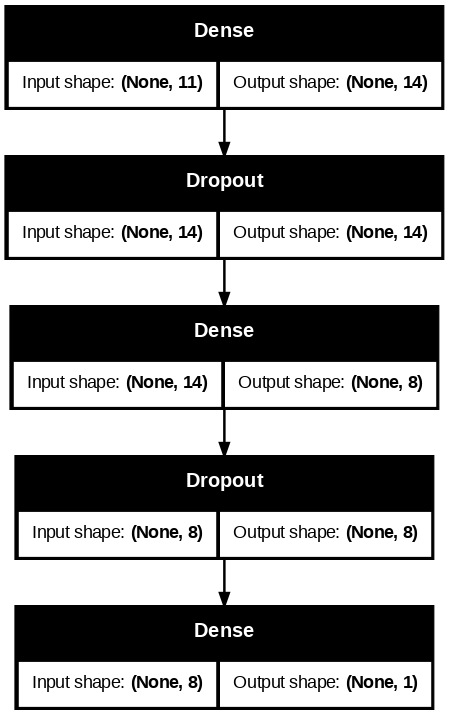

In [ ]:
plot_model(model, to_file = 'Ann_model.png', show_shapes = True,dpi=90)
Image(filename = 'Ann_model.png')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7265 - loss: 0.6006 - val_accuracy: 0.8025 - val_loss: 0.4911
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7923 - loss: 0.5112 - val_accuracy: 0.8055 - val_loss: 0.4497
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7963 - loss: 0.4729 - val_accuracy: 0.8040 - val_loss: 0.4365
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7968 - loss: 0.4640 - val_accuracy: 0.8070 - val_loss: 0.4297
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7951 - loss: 0.4607 - val_accuracy: 0.8085 - val_loss: 0.4249
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8010 - loss: 0.4547 - val_accuracy: 0.8115 - val_loss: 0.4218
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8106 - loss: 0.4389 - val_accuracy: 0.8155 - val_loss: 0.4180
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8102 - loss: 0.4357 - val_acc

In [ ]:
model.layers[0].get_weights()

[array([[ 3.97909321e-02, -3.74654168e-03,  2.74608023e-02,
         -1.03530614e-02,  4.51119579e-02, -7.54569471e-02,
         -2.33818754e-03,  3.56337987e-02,  9.69850793e-02,
         -7.27224350e-02,  1.96028911e-02, -5.14641441e-02,
         -4.18210886e-02,  1.70160010e-01],
        [ 1.42764702e-01,  2.87705362e-02,  2.19512388e-01,
         -4.04391717e-03, -4.88578603e-02, -3.14193964e-02,
         -6.29192870e-03,  2.87055880e-01, -2.56638713e-02,
          1.49350509e-01,  4.38934445e-01, -6.12081401e-02,
          4.31954302e-02,  2.04623759e-01],
        [-1.03698063e+00, -6.62788190e-03, -7.53852665e-01,
          3.31757158e-01, -7.64038265e-01,  1.55661413e-02,
          1.58704109e-02, -8.86429191e-01,  2.53823876e-01,
         -5.53561389e-01,  5.56350835e-02, -2.75004329e-03,
          4.98681426e-01, -1.29701018e-01],
        [-8.53550136e-02,  5.03151491e-02, -4.78143664e-03,
         -5.10530807e-02,  7.43362913e-03, -3.86387168e-04,
          2.43651904e-02, -4

In [ ]:
model.layers[2].get_weights()

[array([[-0.00609076, -1.161726  ,  0.00975836, -0.28172764,  0.16688687,
         -0.13036612, -0.1262178 , -0.04367046],
        [-1.0935715 ,  0.24468268, -0.44920748,  0.24460502, -0.25288668,
          0.47461128, -0.04873556, -0.8738774 ],
        [ 0.16211689, -0.80282724,  0.31415948, -0.7857084 ,  0.04407822,
         -0.12849951, -0.36775935,  0.02793672],
        [-0.58558524,  0.25986114, -0.7850591 ,  1.1403866 , -0.38881186,
          0.8062419 ,  0.90399337, -0.9499482 ],
        [ 0.13473773, -0.90886396,  0.09130566, -0.8105238 , -0.01016747,
         -0.09838317, -0.34752798,  0.08178861],
        [-0.82825226,  0.10482039, -0.42081973,  0.4633336 , -0.33946076,
         -0.37466136,  0.32767847, -0.789234  ],
        [-0.56776804,  1.0430038 , -0.5779079 , -0.24677363, -0.42860952,
          0.55372787, -0.43567294, -0.45686564],
        [ 0.0205981 , -0.61409146,  0.1304211 , -0.4213018 ,  0.22269207,
         -0.10479396, -0.46353567,  0.12216917],
        [-0.0835

In [ ]:
model.layers[4].get_weights()

[array([[-0.6268926 ],
        [ 1.0538185 ],
        [-0.5392815 ],
        [ 0.48485106],
        [-0.67272466],
        [ 1.1606627 ],
        [ 0.9115198 ],
        [-0.7148463 ]], dtype=float32),
 array([-0.9797648], dtype=float32)]

In [ ]:
y_pred = model.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.25661975],
       [0.20579036],
       [0.1240114 ],
       ...,
       [0.2146503 ],
       [0.12796238],
       [0.2362698 ]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

**Evaluation**

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy is:",acc)

Accuracy is: 0.8665


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   62],
       [ 205,  200]])

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

##  *Model Accuracy Plot*

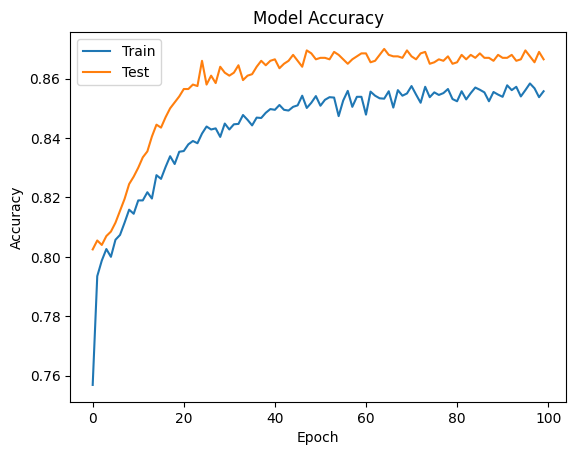

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## *Model Loss Plot*

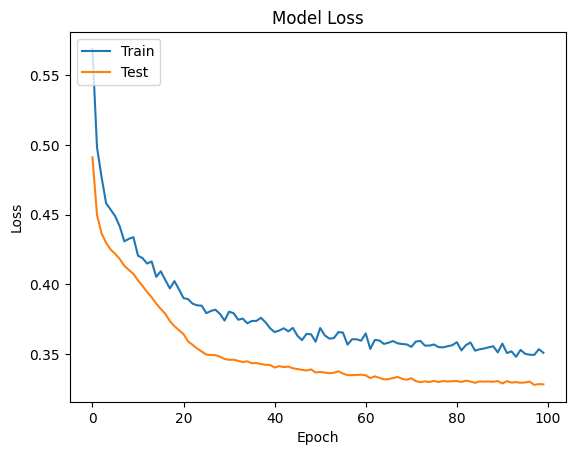

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

## *Confusion Matrix Plot*

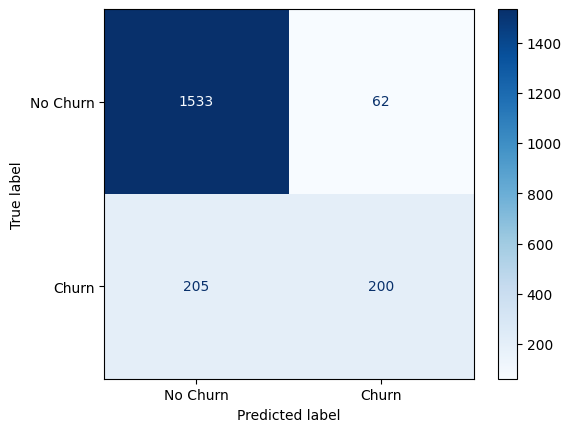

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


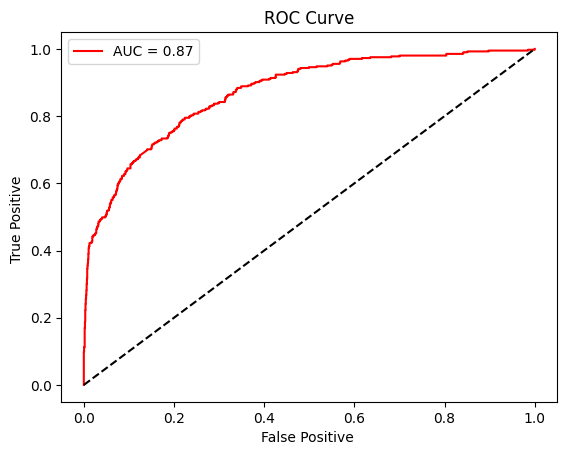

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()
fp, tp, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fp, tp)

plt.plot(fp, tp, label=f'AUC = {roc_auc:.2f}' ,color='red')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC Curve')
plt.legend()
plt.show()

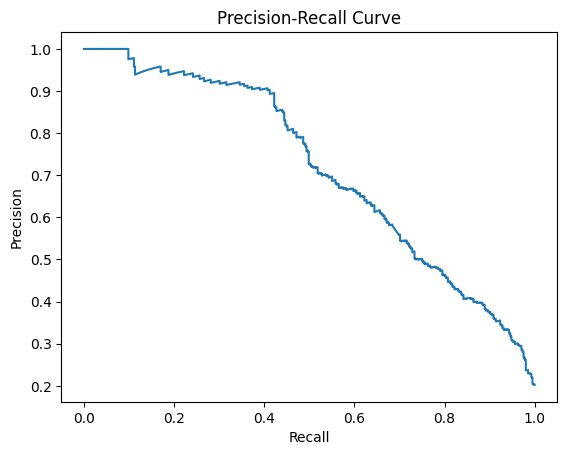

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

##  *Churn Prediction – User Input & Model Prediction*

In [ ]:
#pre-processing input
def preprocess_input(
    credit_score, gender, geography , age, tenure, balance, num_of_products,
    has_cr_card, is_active_member, estimated_salary):
    # Map Gender
    gender_num = 1 if gender.strip().lower() == 'male' else 0
    # One-hot encode Geography
    geo_germany = 1 if geography.strip().lower() == 'germany' else 0
    geo_spain = 1 if geography.strip().lower() == 'spain' else 0
    # Create feature array in model's expected order
    features = np.array(
        [[
            credit_score,
            gender_num,
            age,
            tenure,
            balance,
            num_of_products,
            has_cr_card,
            is_active_member,
            estimated_salary,
            geo_germany,
            geo_spain
        ]]
    )
    return features

# Get inputs from user
trycredit_score = int(input("Enter the Credit Score: "))
geography = input("Enter the Geography (France, Germany, Spain): ")
gender = input("Enter the Gender (Male/Female): ")
age = int(input("Enter the Age: "))
tenure = int(input("Enter the Tenure: "))
balance = float(input("Enter the Balance: "))
num_of_products = int(input("Enter the Number of Products: "))
has_cr_card = int(input("Has Credit Card? (1 for Yes, 0 for No): "))
is_active_member = int(input("Is Active Member? (1 for Yes, 0 for No): "))
estimated_salary = float(input("Enter Estimated Salary: "))

# return features
features = preprocess_input(
    credit_score, gender, geography, age, tenure, balance,
    num_of_products, has_cr_card, is_active_member, estimated_salary
)
features = sc.transform(features)
features = features.astype(np.float32)
# Predict churn probability
prob = model.predict(features)[0][0]

# Print result
if prob > 0.5:
    print(f"Customer is predicted to CHURN with probability {prob:.2f}")
else:
    print(f"Customer is predicted to NOT CHURN with probability {prob:.2f}")

Enter the Credit Score: 616
Enter the Geography (France, Germany, Spain): Germany
Enter the Gender (Male/Female): Male
Enter the Age: 45
Enter the Tenure: 3
Enter the Balance: 143129
Enter the Number of Products: 2
Has Credit Card? (1 for Yes, 0 for No): 0
Is Active Member? (1 for Yes, 0 for No): 1
Enter Estimated Salary: 64327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Customer is predicted to NOT CHURN with probability 0.30


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## ***CONCLUSION***
***Our ANN model achieved an accuracy of 86.66% in predicting customer churn.
This tool can help business improve retention strategies by identifying customer at risk.***